In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, BatchNormalization, Reshape, Conv2DTranspose
from keras.models import Model ,Sequential, load_model
from keras.optimizers import Adam
from keras import backend as K



Using TensorFlow backend.


In [0]:
x_train = np.load('/content/drive/My Drive/1260_mercator/mercator_total.npy')

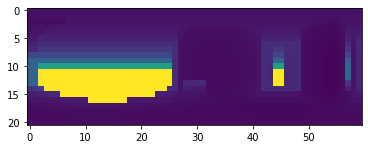

In [0]:
plt.imshow(x_train[120],vmin=-1,vmax=1)

In [0]:
x_train_au = np.expand_dims(x_train,axis=-1)
print(x_train_au.shape)

(57461, 21, 60, 1)


In [0]:
class autoencoder_implementation:

  encoder=Sequential()
  decoder=Sequential()
  autoencoder=Sequential()

  def __init__(self):

    #creating encoder
    self.encoder=Sequential()

    self.encoder.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),input_shape=(21,60,1), activation='tanh',name='e_conv2d_1'))
    #self.encoder.add(LeakyReLU(alpha=0.2))
    self.encoder.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1),name='e_maxpool_1'))
    
    self.encoder.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), activation='tanh',name='e_conv2d_2'))
    #self.encoder.add(LeakyReLU(alpha=0.2))
    self.encoder.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1),name='e_maxpool_2'))
    
    self.encoder.add(Flatten())
    self.encoder.add(Dense(units=128, activation='tanh'))
    self.encoder.add(BatchNormalization())
    
    self.encoder.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5))
    self.encoder.name='encoder'
    self.encoder.summary()

    #creating decoder
    self.decoder=Sequential()

    self.decoder.add(Dense(128 * 5 * 3, input_dim=128, name='dense'))
    self.decoder.add(BatchNormalization())
    self.decoder.add(Reshape((3, 5, 128), name='reshape'))

    self.decoder.add(Conv2DTranspose(64, (5,5), strides=(7,3), padding='same', name='conv2dt_1'))
    self.decoder.add(Conv2DTranspose(1, (5,5), strides=(1,4), padding='same', name='conv2dt_2'))

    self.decoder.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5))
    self.decoder.name='decoder'
    self.decoder.summary()

    #creating autoencoder
    autoencoder_input = Input(shape=(21,60,1))
    x = self.encoder(autoencoder_input)
    autoencoder_output=self.decoder(x)
    self.autoencoder = Model(inputs=[autoencoder_input], outputs=autoencoder_output)
    self.autoencoder.compile(loss='mse', optimizer='adam')
    self.autoencoder.name='autoencoder'
    self.autoencoder.summary()

  def train(self, x_train, y_train, batch_size, epochs):
    contador = 0
    minloss = 1
    while(contador < epochs):
      print("")
      print("epoca {} de {}".format(contador,epochs))
      history = self.autoencoder.fit(x_train, y_train, batch_size, 1)
      nloss = history.history['loss'][0]
      print(nloss)
      if contador == 0 or nloss<minloss:
          self.autoencoder.save("autoencoder_definitivo.h5")
          self.encoder.save("encoder_definitivo.h5")
          self.decoder.save("decoder_definitivo.h5")
          minloss = nloss
          print("")
          print("Saved model to disk")
          print("")
    
      contador += 1




In [0]:
autoen = autoencoder_implementation()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
e_conv2d_1 (Conv2D)          (None, 17, 56, 32)        832       
_________________________________________________________________
e_maxpool_1 (MaxPooling2D)   (None, 16, 55, 32)        0         
_________________________________________________________________
e_conv2d_2 (Conv2D)          (None, 12, 51, 32)        25632     
_________________________________________________________________
e_maxpool_2 (MaxPooling2D)   (None, 11, 50, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 17600)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               2252928   
_________________________________________________________________
batch_normalization_12 (Batc (None, 128)               512 

In [0]:
historial = autoen.train(x_train_au,x_train_au,256,4000)


epoca 0 de 4000
Epoch 1/1
57461/57461 [==============================] - 14s 252us/step - loss: 0.1208
0.12084309934990946

Saved model to disk


epoca 1 de 4000
Epoch 1/1
57461/57461 [==============================] - 13s 228us/step - loss: 0.0418
0.04181834171359014

Saved model to disk


epoca 2 de 4000
Epoch 1/1
57461/57461 [==============================] - 13s 223us/step - loss: 0.0348
0.03477867430017687

Saved model to disk


epoca 3 de 4000
Epoch 1/1
57461/57461 [==============================] - 13s 224us/step - loss: 0.0318
0.0317948310520924

Saved model to disk


epoca 4 de 4000
Epoch 1/1
57461/57461 [==============================] - 13s 224us/step - loss: 0.0301
0.030086177680231353

Saved model to disk


epoca 5 de 4000
Epoch 1/1
57461/57461 [==============================] - 13s 224us/step - loss: 0.0292
0.029175047361303146

Saved model to disk


epoca 6 de 4000
Epoch 1/1
57461/57461 [==============================] - 13s 225us/step - loss: 0.0284
0.02840506979960529

KeyboardInterrupt: ignored

In [0]:
autoencoder = load_model('autoencoder_definitivo.h5')
encoder = load_model('encoder_definitivo.h5')
decoder = load_model('decoder_definitivo.h5')

In [0]:
autoencoder.save('/content/drive/My Drive/Autoencoder_definitivo/autoencoder_definitivo.h5')
encoder.save('/content/drive/My Drive/Autoencoder_definitivo/encoder_definitivo.h5')
decoder.save('/content/drive/My Drive/Autoencoder_definitivo/decoder_definitivo.h5')